<a href="https://colab.research.google.com/github/zal-eun/khuda_recsys_hm/blob/main/Khuda3_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
articles = pd.read_csv("/content/drive/MyDrive/Khuda3차/초기자료/articles.csv")
customers = pd.read_csv("/content/drive/MyDrive/Khuda3차/초기자료/customers.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Khuda3차/초기자료/transactions_train.csv")

In [ ]:
articles.head()

article_id  product_code          prod_name  product_type_no  \
0   108775015        108775          Strap top              253   
1   108775044        108775          Strap top              253   
2   108775051        108775      Strap top (1)              253   
3   110065001        110065  OP T-shirt (Idro)              306   
4   110065002        110065  OP T-shirt (Idro)              306   

  product_type_name  product_group_name  graphical_appearance_no  \
0          Vest top  Garment Upper body                  1010016   
1          Vest top  Garment Upper body                  1010016   
2          Vest top  Garment Upper body                  1010017   
3               Bra           Underwear                  1010016   
4               Bra           Underwear                  1010016   

  graphical_appearance_name  colour_group_code colour_group_name  ...  \
0                     Solid                  9             Black  ...   
1                     Solid                 10             White  ...   
2                    Stripe                 11         Off White  ...   
3                     Solid                  9             Black  ...   
4                     Solid                 10             White  ...   

   department_name index_code        index_name index_group_no  \
0     Jersey Basic          A        Ladieswear              1   
1     Jersey Basic          A        Ladieswear              1   
2     Jersey Basic          A        Ladieswear              1   
3   Clean Lingerie          B  Lingeries/Tights              1   
4   Clean Lingerie          B  Lingeries/Tights              1   

   index_group_name section_no            section_name garment_group_no  \
0        Ladieswear         16  Womens Everyday Basics             1002   
1        Ladieswear         16  Womens Everyday Basics             1002   
2        Ladieswear         16  Womens Everyday Basics             1002   
3        Ladieswear         61         Womens Lingerie             1017   
4        Ladieswear         61         Womens Lingerie             1017   

   garment_group_name                                        detail_desc  
0        Jersey Basic            Jersey top with narrow shoulder straps.  
1        Jersey Basic            Jersey top with narrow shoulder straps.  
2        Jersey Basic            Jersey top with narrow shoulder straps.  
3   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  
4   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  

[5 rows x 25 columns]

article_id : 제품 고유 식별 번호

product_code, prod_name : 제품군 코드번호 및 제품군 이름

product_type, product_type_name : 제품 그룹 이름

graphical_appearance_no, graphical_appearance_name : 그래픽 그룹 및 이름

colour_group_code, colour_group_name : 색상 그룹과 이름

perceived_colour_value_id, perceived_colour_value_name, perceived_colour_master_id, perceived_colour_master_name : 색상정보

department_no, department_name: : 모든 부서 및 해당 이름의 고유 식별자

index_code, index_name: : 모든 index의 고유 식별자 및 해당 이름

index_group_no, index_group_name: 인덱스 그룹 및 그 이름

section_no, section_name: 모든 섹션의 고유 식별자 및 해당 이름

garment_group_no, garment_group_name: 모든 의복과 그 이름의 고유 식별자

detail_desc: Details

### 제품 종류


Text(0.5, 1.0, 'Count The Number of Each Index Name')

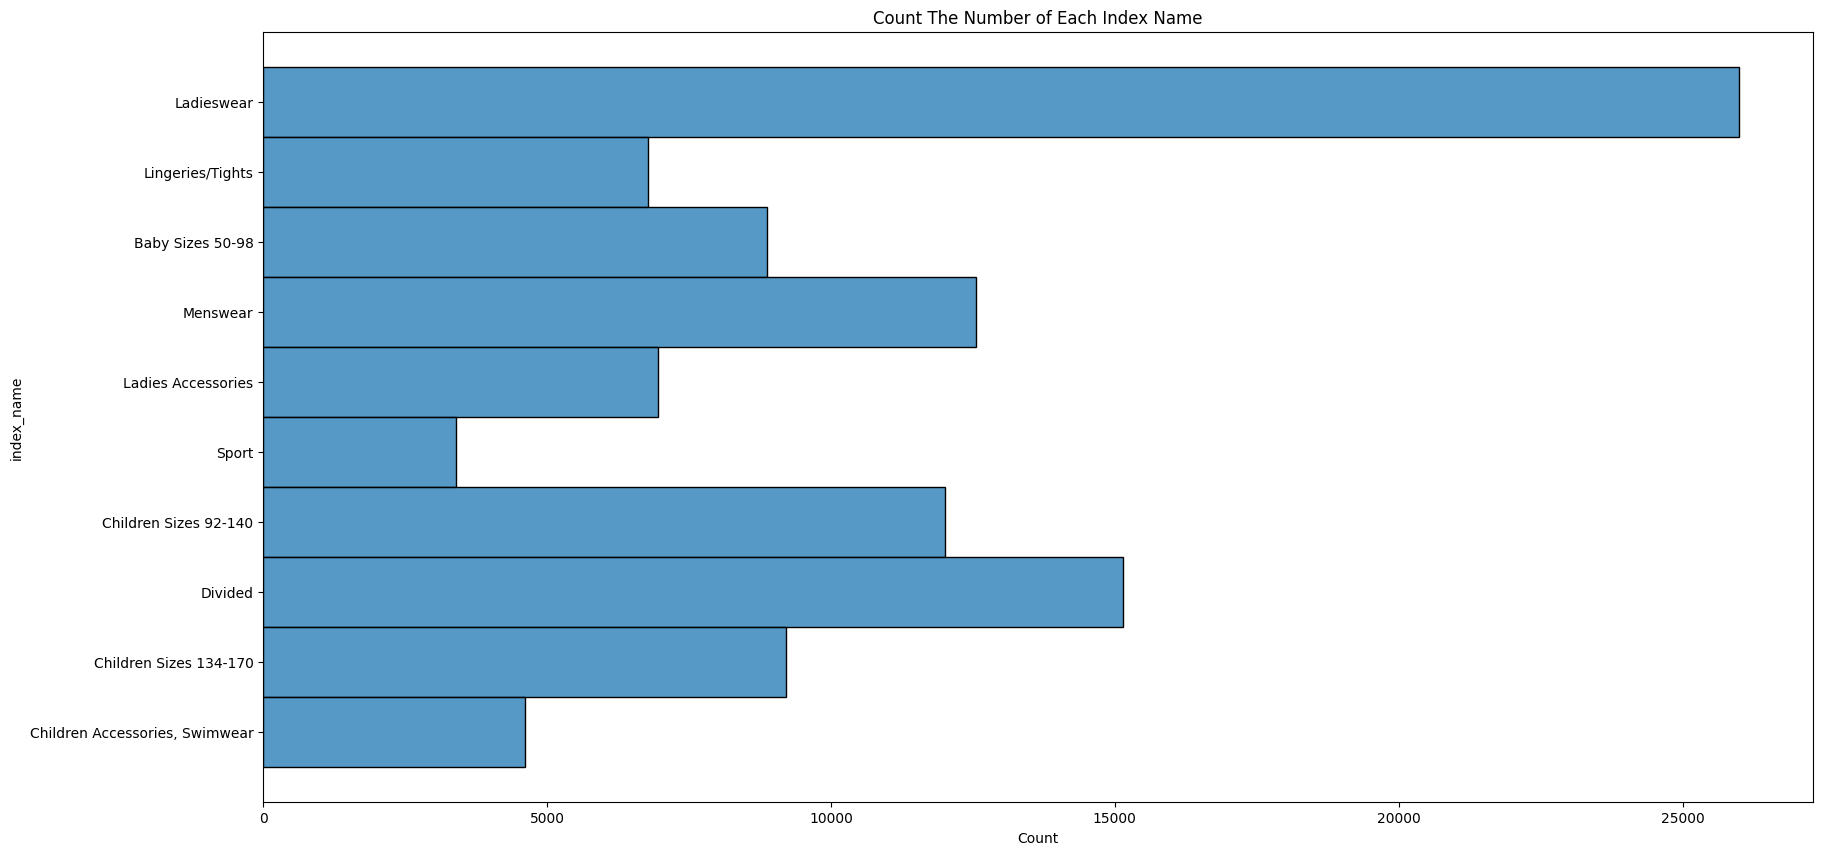

In [ ]:
plt.figure(figsize = (20,10))
sns.histplot(data=articles,y='index_name',kde=False)
plt.title("Count The Number of Each Index Name")



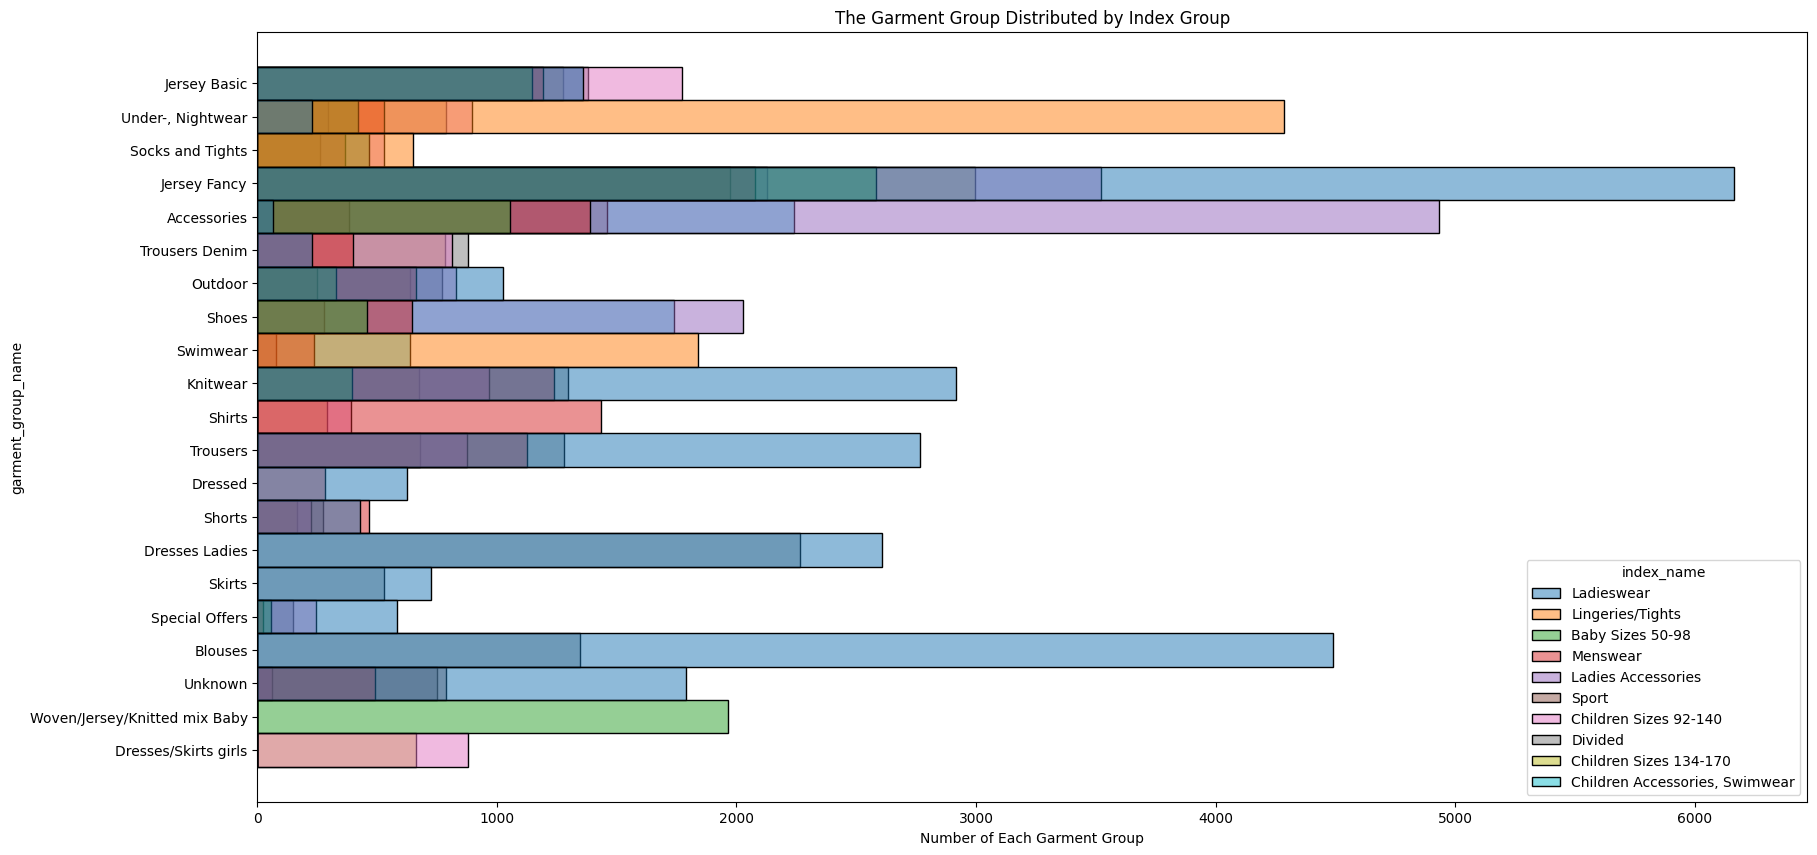

In [ ]:
plt.figure(figsize = (20,10))
sns.histplot(data=articles,y='garment_group_name',hue = 'index_name',kde=False,color = 'blue')
plt.title("The Garment Group Distributed by Index Group")
plt.xlabel("Number of Each Garment Group")
plt.show()

In [ ]:
col = [cname for cname in articles.columns if articles[cname].dtype in ['object']]
for i in col:
    columns = articles[i].nunique()
    print(f'{i} : {columns} \n')

prod_name : 45875 

product_type_name : 131 

product_group_name : 19 

graphical_appearance_name : 30 

colour_group_name : 50 

perceived_colour_value_name : 8 

perceived_colour_master_name : 20 

department_name : 250 

index_code : 10 

index_name : 10 

index_group_name : 5 

section_name : 56 

garment_group_name : 21 

detail_desc : 43404 



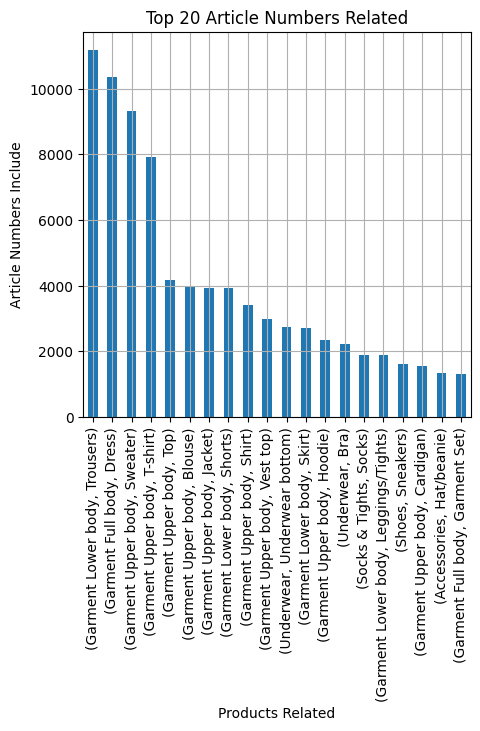

In [ ]:
plt.figure(figsize = (5,5))
group_sales = articles.groupby(['product_group_name', 'product_type_name']).count().sort_values('article_id',ascending = False)['article_id'][:20]
group_sales.plot(kind = 'bar',grid = True)
plt.xlabel("Products Related")
plt.ylabel("Article Numbers Include")
plt.title("Top 20 Article Numbers Related")
plt.show()

**굵은 텍스트**### 그래픽

```
# 코드로 형식 지정됨
```



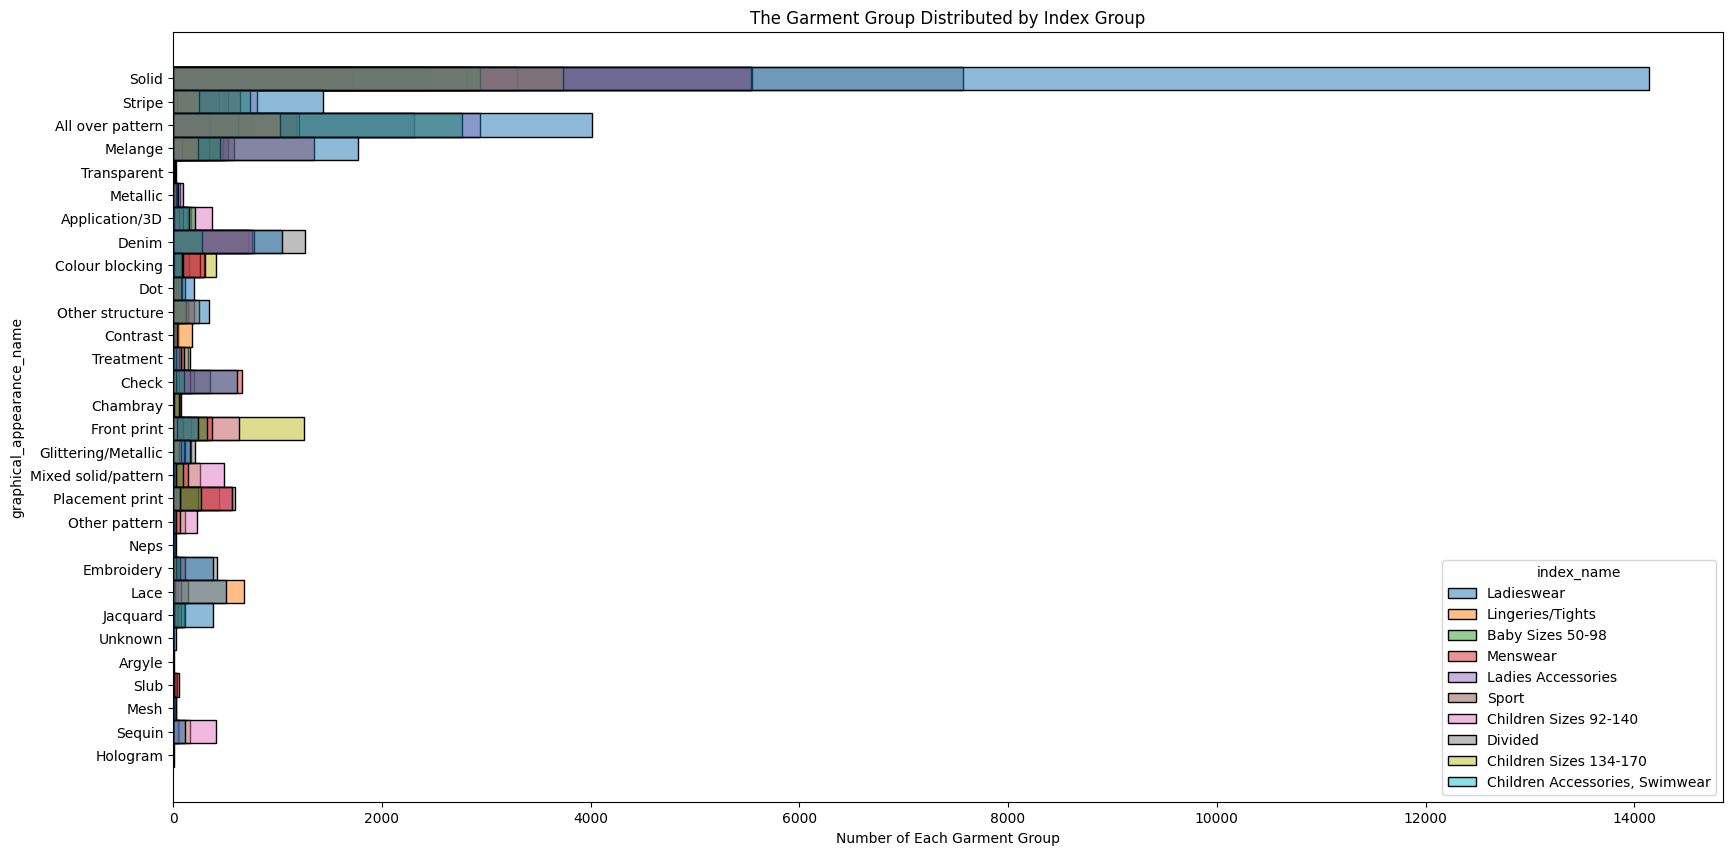

In [ ]:
plt.figure(figsize = (20,10))
sns.histplot(data=articles,y='graphical_appearance_name',hue = 'index_name',kde=False, color='blue')
plt.title("The Garment Group Distributed by Index Group")
plt.xlabel("Number of Each Garment Group")
plt.show()

In [ ]:
null = articles['colour_group_name'].isnull().sum()
print(null) #결측치 확인

0


In [ ]:
customers.head()

customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  NaN     NaN   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  NaN     NaN   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  NaN     NaN   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  NaN     NaN   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   NONE  49.0   
1             ACTIVE                   NONE  25.0   
2             ACTIVE                   NONE  24.0   
3             ACTIVE                   NONE  54.0   
4             ACTIVE              Regularly  52.0   

                                         postal_code  
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  
1  2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...  
2  64f17e6a330a85798e4998f62d0930d14db8db1c054af6...  
3  5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...  
4  25fa5ddee9aac01b35208d01736e57942317d756b32ddd...

In [ ]:
customers.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

In [ ]:
customers.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [ ]:
customers.describe().transpose()

count       mean        std   min   25%   50%   75%   max
FN       476930.0   1.000000   0.000000   1.0   1.0   1.0   1.0   1.0
Active   464404.0   1.000000   0.000000   1.0   1.0   1.0   1.0   1.0
age     1356119.0  36.386965  14.313628  16.0  24.0  32.0  49.0  99.0

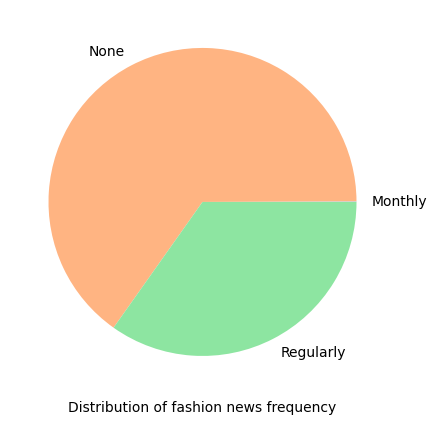

In [ ]:


customers.loc[~customers['fashion_news_frequency'].isin(['Regularly', 'Monthly']),'fashion_news_frequency'] = 'None'

pie_data = customers[['customer_id', 'fashion_news_frequency']].groupby('fashion_news_frequency').count()

f, ax= plt.subplots(figsize=(10,5))
colors = sns.color_palette('pastel')
ax.pie(pie_data.customer_id, labels=pie_data.index, colors = colors)
ax.set_facecolor('lightgrey')
ax.set_xlabel("Distribution of fashion news frequency")
plt.show()

In [ ]:
pie_data = customers[['customer_id','fashion_news_frequency']].groupby('fashion_news_frequency').count()
pie_data

customer_id
fashion_news_frequency             
Monthly                         842
None                         893722
Regularly                    477416

In [ ]:


dropCustomers = customers.dropna()
dropCustomers = customers.drop_duplicates()

fig = px.histogram(dropCustomers.age, x="age", title="Distribution of Customers' Age")
fig.update_traces(marker_color = 'pink', marker_line_width=2, marker_line_color='purple', marker_opacity =0.5)
fig.show()

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
null = articles['colour_group_name'].isnull().sum()
print(null) #결측치 확인

0


In [ ]:
colorGroup= articles["colour_group_name"].value_counts()
colorGroup
#데이터프레임화 불가->다른함수 이용

Black              22670
Dark Blue          12171
White               9542
Light Pink          5811
Grey                4487
Light Beige         3356
Blue                3308
Red                 3056
Light Blue          3012
Greenish Khaki      2767
Dark Grey           2731
Off White           2726
Beige               2712
Dark Red            2340
Dark Green          2106
Light Grey          2105
Pink                2063
Yellow              1645
Light Orange        1520
Yellowish Brown     1471
Gold                1377
Dark Beige          1084
Light Turquoise     1027
Light Yellow         984
Dark Orange          886
Dark Pink            818
Green                815
Orange               779
Other Pink           750
Silver               709
Light Green          681
Dark Yellow          574
Light Purple         553
Dark Turquoise       473
Turquoise            435
Dark Purple          315
Light Red            285
Greyish Beige        226
Other Yellow         225
Purple               182


In [ ]:
df2 = articles[["colour_group_code","article_id"]]
colorCode= df2.groupby("colour_group_code").count()
sorted_colorCode= colorCode.sort_values(by="article_id", ascending = False)

df = articles[["colour_group_name","article_id"]]
color= df.groupby("colour_group_name").count()
sorted_color= color.sort_values(by="article_id", ascending = False)

sorted_color["color_group_code"]=sorted_colorCode.index
sorted_color = sorted_color[["color_group_code","article_id"]]
sorted_color

color_group_code  article_id
colour_group_name                              
Black                             9       22670
Dark Blue                        73       12171
White                            10        9542
Light Pink                       51        5811
Grey                              7        4487
Light Beige                      12        3356
Blue                             72        3308
Red                              42        3056
Light Blue                       71        3012
Greenish Khaki                   19        2767
Dark Grey                         8        2731
Off White                        11        2726
Beige                            13        2712
Dark Red                         43        2340
Dark Green                       93        2106
Light Grey                        6        2105
Pink                             52        2063
Yellow                           22        1645
Light Orange                     31        1520
Yellowish Brown                  17        1471
Gold                              5        1377
Dark Beige                       14        1084
Light Turquoise                  81        1027
Light Yellow                     21         984
Dark Orange                      33         886
Dark Pink                        53         818
Green                            92         815
Orange                           32         779
Other Pink                       50         750
Silver                            3         709
Light Green                      91         681
Dark Yellow                      23         574
Light Purple                     61         553
Dark Turquoise                   83         473
Turquoise                        82         435
Dark Purple                      63         315
Light Red                        41         285
Greyish Beige                    15         226
Other Yellow                     20         225
Purple                           62         182
Other Orange                     30         153
Other Green                      90         129
Other Red                        40         114
Other                             1         105
Bronze/Copper                     4          94
Other Blue                       70          51
Other Purple                     60          46
Transparent                       2          31
Unknown                          -1          28
Other Turquoise                  80          14

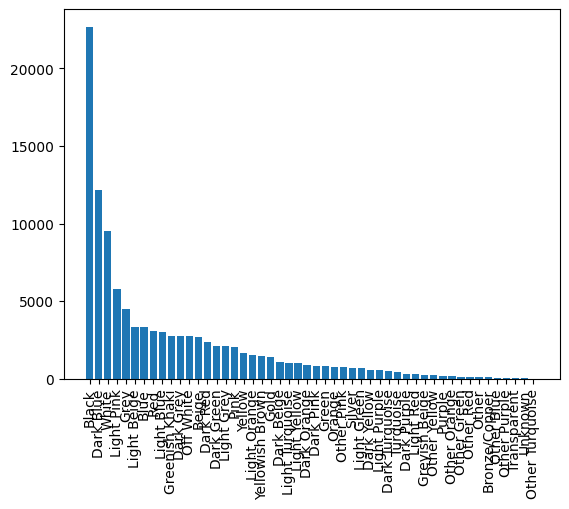

<Figure size 1e+07x10000 with 0 Axes>

In [ ]:
import numpy as np
x = np.arange(50)
X = sorted_color.index
Y = sorted_color["article_id"]

plt.bar(x,Y)
plt.xticks(x, X)
plt.xticks(rotation = 90)
plt.figure(figsize = (100000,100))

plt.show()

In [ ]:
sorted_color.head(10)
#블랙,다크블루,화이트,라이트핑크,그레이,라이트베이지,블루,레드,라이트블루,카키
#블랙 압도적

color_group_code  article_id
colour_group_name                              
Black                             9       22670
Dark Blue                        73       12171
White                            10        9542
Light Pink                       51        5811
Grey                              7        4487
Light Beige                      12        3356
Blue                             72        3308
Red                              42        3056
Light Blue                       71        3012
Greenish Khaki                   19        2767

In [ ]:
#perceived color로 다시 진행
null = articles[['perceived_colour_value_id', 'perceived_colour_value_name',
            'perceived_colour_master_id', 'perceived_colour_master_name']].isnull().sum()
print(null) #결측치 확인

perceived_colour_value_id       0
perceived_colour_value_name     0
perceived_colour_master_id      0
perceived_colour_master_name    0
dtype: int64


In [ ]:
perceived_color= articles[['perceived_colour_value_id', 'perceived_colour_value_name',
     'perceived_colour_master_id', 'perceived_colour_master_name',"article_id"]]

perceived_color

perceived_colour_value_id perceived_colour_value_name  \
0                               4                        Dark   
1                               3                       Light   
2                               1                 Dusty Light   
3                               4                        Dark   
4                               3                       Light   
...                           ...                         ...   
105537                          4                        Dark   
105538                          4                        Dark   
105539                          4                        Dark   
105540                          4                        Dark   
105541                          1                 Dusty Light   

        perceived_colour_master_id perceived_colour_master_name  article_id  
0                                5                        Black   108775015  
1                                9                        White   108775044  
2                                9                        White   108775051  
3                                5                        Black   110065001  
4                                9                        White   110065002  
...                            ...                          ...         ...  
105537                           5                        Black   953450001  
105538                           5                        Black   953763001  
105539                           5                        Black   956217002  
105540                           5                        Black   957375001  
105541                           9                        White   959461001  

[105542 rows x 5 columns]

In [ ]:
perceived_color_value_Id = perceived_color[['perceived_colour_value_id', "article_id"]]
perceived_color_value_Id = perceived_color_value_Id.groupby('perceived_colour_value_id').count()
perceived_color_value_Id= perceived_color_value_Id.sort_values(by="article_id", ascending = False)

perceived_color_value_Name = perceived_color[['perceived_colour_value_name', "article_id"]]
perceived_color_value_Name = perceived_color_value_Name.groupby('perceived_colour_value_name').count()
perceived_color_value_Name= perceived_color_value_Name.sort_values(by="article_id", ascending = False)

perceived_color_value_Name["perceived_colour_value_id"]=perceived_color_value_Id.index
perceived_color_value_Name = perceived_color_value_Name[["perceived_colour_value_id","article_id"]]
perceived_color_value_Name

perceived_colour_value_id  article_id
perceived_colour_value_name                                       
Dark                                                 4       42706
Dusty Light                                          1       22152
Light                                                3       15739
Medium Dusty                                         2       12630
Bright                                               5        6471
Medium                                               7        5711
Undefined                                            6         105
Unknown                                             -1          28

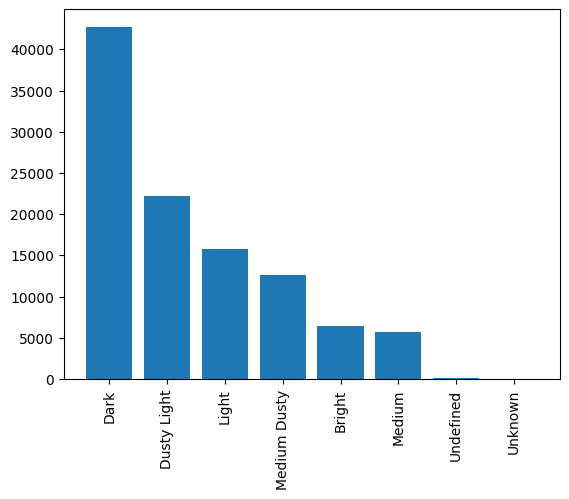

<Figure size 1e+07x10000 with 0 Axes>

In [ ]:
x = np.arange(8)
X = perceived_color_value_Name.index
Y = perceived_color_value_Name["article_id"]

plt.bar(x,Y)
plt.xticks(x, X)
plt.xticks(rotation = 90)
plt.figure(figsize = (100000,100))

plt.show()

In [ ]:
Index= perceived_color_value_Name.index
Index

Index(['Dark', 'Dusty Light', 'Light', 'Medium Dusty', 'Bright', 'Medium',
       'Undefined', 'Unknown'],
      dtype='object', name='perceived_colour_value_name')

In [ ]:
color_in_perceived = articles[['colour_group_name','perceived_colour_value_name']]
color_in_perceived.iloc[1,0]

'White'

In [ ]:
color_in_perceived = articles[['colour_group_name','perceived_colour_value_name']]
for i in range(len(Index)) :
  Pcolor = Index[i]
  print (Pcolor)
  color_index = []
  for j in range (105542) :

    if ((color_in_perceived.iloc[j,1] == Pcolor )and (color_in_perceived.iloc[j,0] not in color_index)) :
      color_index.append(color_in_perceived.iloc[j,0])

  print (color_index)
  print (len(color_index))


##같은 grey여도 인지되는 색이 다를 수 있음
##원래 색 50

Dark
['Black', 'Dark Blue', 'Dark Grey', 'Dark Red', 'Greyish Beige', 'Yellowish Brown', 'Greenish Khaki', 'Dark Green', 'Dark Pink', 'Dark Purple', 'Dark Yellow', 'Dark Beige', 'Red', 'Dark Turquoise', 'Beige', 'Dark Orange', 'Grey', 'Yellow', 'Orange', 'Bronze/Copper']
20
Dusty Light
['Off White', 'Light Beige', 'Grey', 'Light Blue', 'Light Grey', 'Light Pink', 'Light Turquoise', 'Light Orange', 'Greenish Khaki', 'Beige', 'Pink', 'Purple', 'Green', 'White', 'Dark Blue', 'Light Green', 'Turquoise', 'Light Purple', 'Yellow', 'Blue', 'Silver', 'Light Yellow', 'Orange']
23
Light
['White', 'Light Orange', 'Silver', 'Blue', 'Light Blue', 'Transparent', 'Light Pink', 'Light Green', 'Off White', 'Purple', 'Dark Pink', 'Light Turquoise', 'Turquoise', 'Light Yellow', 'Green', 'Light Purple', 'Light Grey', 'Pink', 'Other Pink', 'Orange', 'Other Orange', 'Other Green', 'Other Yellow']
23
Medium Dusty
['Beige', 'Grey', 'Pink', 'Dark Blue', 'Yellowish Brown', 'Light Grey', 'Dark Pink', 'Dark Yello

In [ ]:
'perceived_colour_master_id', 'perceived_colour_master_name',"article_id"
perceived_colour_master_id = perceived_color[['perceived_colour_master_id', "article_id"]]
perceived_colour_master_id = perceived_colour_master_id.groupby('perceived_colour_master_id').count()
perceived_colour_master_id= perceived_colour_master_id.sort_values(by="article_id", ascending = False)

perceived_colour_master_name = perceived_color[['perceived_colour_master_name', "article_id"]]
perceived_colour_master_name = perceived_colour_master_name.groupby('perceived_colour_master_name').count()
perceived_colour_master_name= perceived_colour_master_name.sort_values(by="article_id", ascending = False)

perceived_colour_master_name["perceived_colour_master_id"]=perceived_colour_master_id.index
perceived_colour_master_name = perceived_colour_master_name[["perceived_colour_master_id","article_id"]]
perceived_colour_master_name

perceived_colour_master_id  article_id
perceived_colour_master_name                                        
Black                                                  5       22585
Blue                                                   2       18469
White                                                  9       12665
Pink                                                   4        9403
Grey                                                  12        8924
Red                                                   18        5878
Beige                                                 11        5657
Green                                                 19        3526
Khaki green                                           20        3181
Yellow                                                 8        3121
Orange                                                 3        2734
Brown                                                 13        2269
Metal                                                 15        2180
Turquoise                                              7        1829
Mole                                                   1        1223
Lilac Purple                                           6        1100
Unknown                                               -1         685
undefined                                             14         105
Yellowish Green                                       10           5
Bluish Green                                          16           3

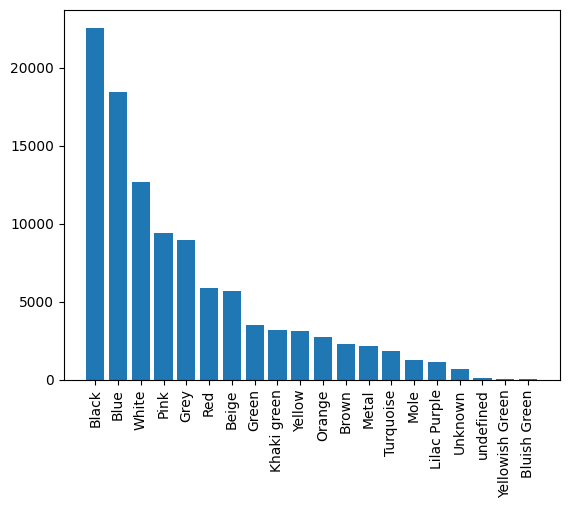

<Figure size 1e+07x10000 with 0 Axes>

In [ ]:
x = np.arange(20)
X = perceived_colour_master_name.index
Y = perceived_colour_master_name["article_id"]

plt.bar(x,Y)
plt.xticks(x, X)
plt.xticks(rotation = 90)
plt.figure(figsize = (100000,100))

plt.show()

In [ ]:
Index =perceived_colour_master_name.index
perceived_colour_master = articles[['colour_group_name','perceived_colour_master_name','perceived_colour_value_name']]
for i in range(19) :
  Mcolor = Index[i]
  print (Mcolor)
  color_index = []
  Pcolor_index = []
  for j in range (105542) :

    if ((perceived_colour_master.iloc[j,1] == Mcolor )and (perceived_colour_master.iloc[j,0] not in color_index)) :
      color_index.append(perceived_colour_master.iloc[j,0])
    if ((perceived_colour_master.iloc[j,1] == Mcolor )and (perceived_colour_master.iloc[j,2] not in Pcolor_index)) :
      Pcolor_index.append(perceived_colour_master.iloc[j,2])

  print (color_index)
  print (len(color_index))
#  print (Pcolor_index)
 # print (len(Pcolor_index))
 #'Beige'가 Grey랑 beige,mole에도 존재 -> 겹침
#색의 구성색상도 아님..

Black
['Black', 'Dark Grey']
2
Blue
['Light Blue', 'Dark Blue', 'Blue', 'Grey', 'Light Grey', 'Other Blue', 'Light Turquoise', 'Turquoise', 'Dark Purple']
9
White
['White', 'Off White', 'Transparent', 'Light Beige', 'Light Purple', 'Light Orange']
6
Pink
['Pink', 'Light Pink', 'Dark Pink', 'Other Pink', 'Dark Red', 'Light Orange', 'Light Purple', 'Red', 'Purple', 'Light Red']
10
Grey
['Grey', 'Light Grey', 'Dark Grey', 'Black', 'Dark Purple', 'Dark Green', 'Light Turquoise', 'Light Green', 'Beige', 'Turquoise', 'Dark Blue', 'Green']
12
Red
['Dark Red', 'Red', 'Dark Pink', 'Other Red', 'Dark Orange', 'Light Red', 'Pink', 'Other Orange', 'Orange', 'Other Pink', 'Dark Purple']
11
Beige
['Light Beige', 'Beige', 'Dark Beige', 'Dark Yellow', 'Light Grey', 'Dark Orange', 'Yellow', 'Orange', 'Yellowish Brown', 'Grey', 'Light Pink', 'Light Yellow', 'Greenish Khaki', 'Light Orange']
14
Green
['Dark Green', 'Light Green', 'Light Yellow', 'Green', 'Black', 'Other Green', 'Dark Turquoise', 'Turquoi

In [ ]:
for i in range(19) :
  Mcolor = Index[i]
  print (Mcolor)
  color_index = []
  Pcolor_index = []
  for j in range (105542) :

    if ((perceived_colour_master.iloc[j,1] == Mcolor )and (perceived_colour_master.iloc[j,0] not in color_index)) :
      color_index.append(perceived_colour_master.iloc[j,0])
    if ((perceived_colour_master.iloc[j,1] == Mcolor )and (perceived_colour_master.iloc[j,2] not in Pcolor_index)) :
      Pcolor_index.append(perceived_colour_master.iloc[j,2])


  print (Pcolor_index)
  print (len(Pcolor_index))

Black
['Dark']
1
Blue
['Dusty Light', 'Dark', 'Light', 'Medium', 'Medium Dusty', 'Bright']
6
White
['Light', 'Dusty Light']
2
Pink
['Medium Dusty', 'Dusty Light', 'Bright', 'Light', 'Medium', 'Dark']
6
Grey
['Dusty Light', 'Dark', 'Medium Dusty']
3
Red
['Dark', 'Medium', 'Bright', 'Medium Dusty']
4
Beige
['Dusty Light', 'Medium Dusty', 'Dark']
3
Green
['Dark', 'Medium Dusty', 'Medium', 'Light', 'Bright', 'Dusty Light']
6
Khaki green
['Dark', 'Medium Dusty', 'Dusty Light']
3
Yellow
['Medium', 'Dark', 'Medium Dusty', 'Bright', 'Light', 'Dusty Light']
6
Orange
['Light', 'Dusty Light', 'Bright', 'Medium', 'Medium Dusty', 'Dark']
6
Brown
['Medium Dusty', 'Dark']
2
Metal
['Light', 'Bright', 'Medium', 'Medium Dusty', 'Dusty Light', 'Dark']
6
Turquoise
['Dusty Light', 'Bright', 'Light', 'Medium Dusty', 'Dark', 'Medium']
6
Mole
['Dark', 'Medium Dusty', 'Dusty Light']
3
Lilac Purple
['Medium Dusty', 'Medium', 'Bright', 'Dark', 'Dusty Light', 'Light']
6
Unknown
['Medium Dusty', 'Light', 'Dark', '

In [ ]:
#그룹이름
articles[["article_id",'index_group_name']]

article_id index_group_name
0        108775015       Ladieswear
1        108775044       Ladieswear
2        108775051       Ladieswear
3        110065001       Ladieswear
4        110065002       Ladieswear
...            ...              ...
105537   953450001         Menswear
105538   953763001       Ladieswear
105539   956217002       Ladieswear
105540   957375001          Divided
105541   959461001       Ladieswear

[105542 rows x 2 columns]

In [ ]:
index_group_name = articles[["article_id",'index_group_name']]
index_group_name= index_group_name.groupby("index_group_name").count()
index_group_name= index_group_name.sort_values(by="article_id", ascending = False)

index_group_name

article_id
index_group_name            
Ladieswear             39737
Baby/Children          34711
Divided                15149
Menswear               12553
Sport                   3392

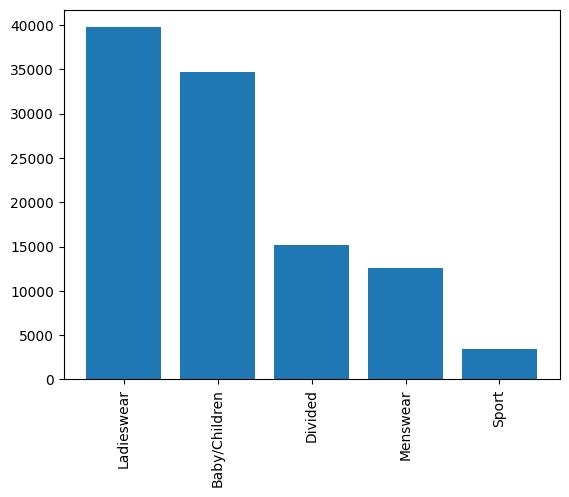

<Figure size 100000x1000 with 0 Axes>

In [ ]:
x = np.arange(5)
X = index_group_name.index
Y = index_group_name["article_id"]

plt.bar(x,Y)
plt.xticks(x, X)
plt.xticks(rotation = 90)
plt.figure(figsize = (1000,10))

plt.show()

Ladieswear
                   index_group_name
colour_group_name                  
Black                         10188
White                          3829
Dark Blue                      2616
Light Beige                    1946
Light Pink                     1514
Off White                      1417
Beige                          1415
Gold                           1179
Dark Red                       1053
Red                            1047
Light Blue                      988
Grey                            976
Greenish Khaki                  873
Dark Green                      863
Light Orange                    810
Blue                            805
Pink                            794
Dark Grey                       782
Yellowish Brown                 741
Light Grey                      629
Dark Orange                     564
Yellow                          535
Dark Beige                      462
Silver                          453
Orange                          370
Dark Pink        

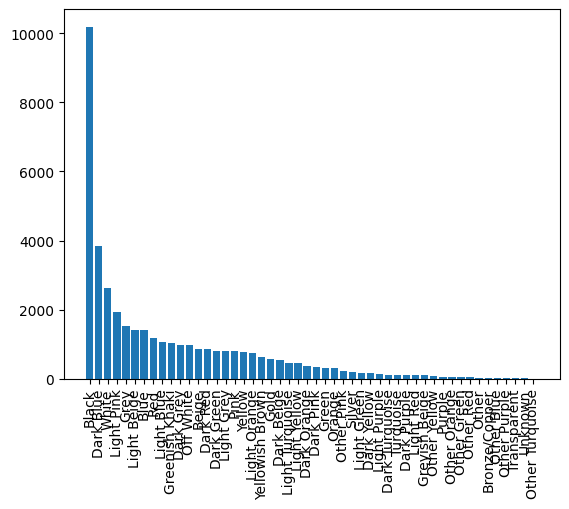

<Figure size 100000x1000 with 0 Axes>

In [ ]:
GIndex = index_group_name.index
CIndex = sorted_color.index
index_color = articles[['index_group_name',"colour_group_name"]]

G = GIndex[0]
print (G)##########
Group_color = []
new_G = index_color.loc[(index_color['index_group_name'] == G)]

new_G= new_G.groupby("colour_group_name").count()
new_G= new_G.sort_values(by="index_group_name", ascending = False)
print (new_G)

x = np.arange(50)
X = CIndex
Y = new_G["index_group_name"]

plt.bar(x,Y)
plt.xticks(x, X)
plt.xticks(rotation = 90)
plt.figure(figsize = (1000,10))

plt.show()

  #if ((index_group_name.iloc[j,1] == Mcolor )and (perceived_colour_master.iloc[j,0] not in color_index)) :
      #color_index.append(perceived_colour_master.iloc[j,0])
  #if ((perceived_colour_master.iloc[j,1] == Mcolor )and (perceived_colour_master.iloc[j,2] not in Pcolor_index)) :
      #Pcolor_index.append(perceived_colour_master.iloc[j,2])

Ladieswear
                   index_group_name
colour_group_name                  
Black                         10188
White                          3829
Dark Blue                      2616
Light Beige                    1946
Light Pink                     1514
Off White                      1417
Beige                          1415
Gold                           1179
Dark Red                       1053
Red                            1047
Light Blue                      988
Grey                            976
Greenish Khaki                  873
Dark Green                      863
Light Orange                    810
Blue                            805
Pink                            794
Dark Grey                       782
Yellowish Brown                 741
Light Grey                      629
Dark Orange                     564
Yellow                          535
Dark Beige                      462
Silver                          453
Orange                          370
Dark Pink        

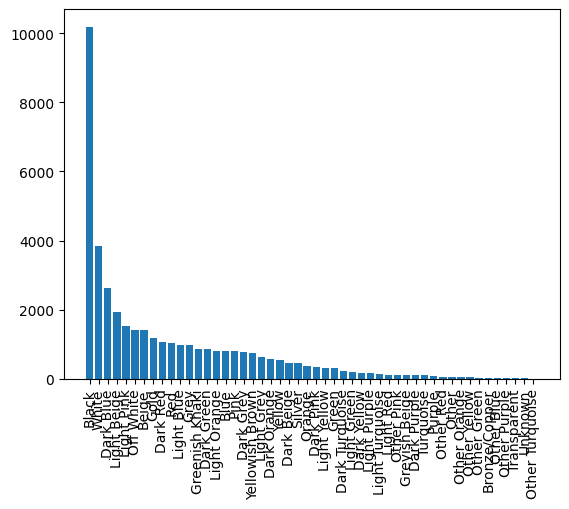

<Figure size 100000x1000 with 0 Axes>

Baby/Children
                   index_group_name
colour_group_name                  
Dark Blue                      6267
Black                          3478
Light Pink                     3322
White                          3269
Grey                           2345
Blue                           1436
Light Blue                     1196
Red                            1095
Light Grey                      936
Greenish Khaki                  901
Dark Grey                       880
Off White                       846
Light Beige                     801
Pink                            717
Light Turquoise                 716
Yellow                          606
Dark Red                        506
Other Pink                      493
Dark Green                      483
Light Yellow                    440
Light Orange                    418
Beige                           386
Green                           351
Light Green                     309
Yellowish Brown                 257
Dark Beige    

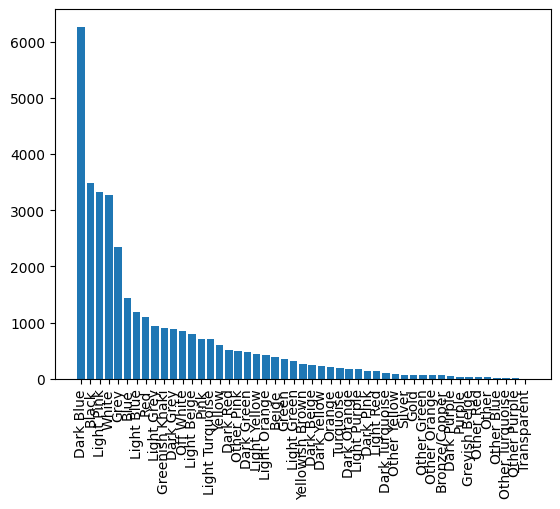

<Figure size 100000x1000 with 0 Axes>

Divided
                   index_group_name
colour_group_name                  
Black                          4694
White                          1338
Light Pink                      748
Dark Blue                       711
Blue                            698
Red                             611
Beige                           544
Light Blue                      527
Greenish Khaki                  482
Grey                            441
Pink                            390
Light Beige                     373
Yellow                          330
Off White                       319
Dark Red                        313
Dark Grey                       281
Light Grey                      253
Dark Green                      226
Light Orange                    204
Dark Pink                       197
Light Purple                    172
Light Yellow                    138
Green                           115
Light Turquoise                  97
Light Green                      95
Orange              

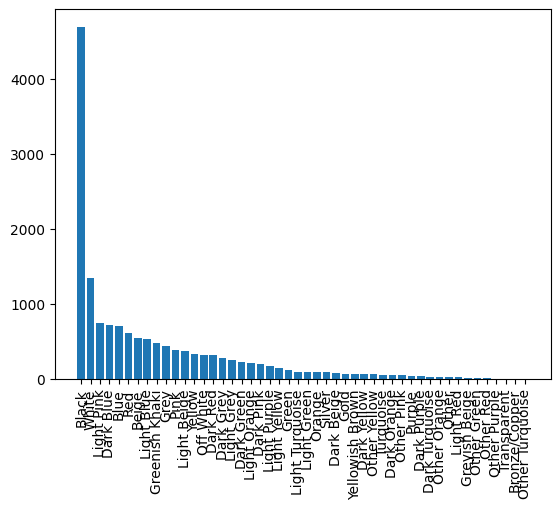

<Figure size 100000x1000 with 0 Axes>

Menswear
                   index_group_name
colour_group_name                  
Black                          2993
Dark Blue                      2259
White                           920
Grey                            565
Dark Grey                       540
Greenish Khaki                  469
Dark Green                      443
Dark Red                        398
Yellowish Brown                 390
Blue                            351
Beige                           346
Dark Beige                      302
Light Blue                      290
Red                             266
Light Grey                      238
Light Beige                     204
Yellow                          163
Light Pink                      140
Off White                       136
Dark Yellow                      99
Silver                           96
Orange                           80
Dark Orange                      79
Dark Pink                        76
Dark Turquoise                   70
Dark Purple        

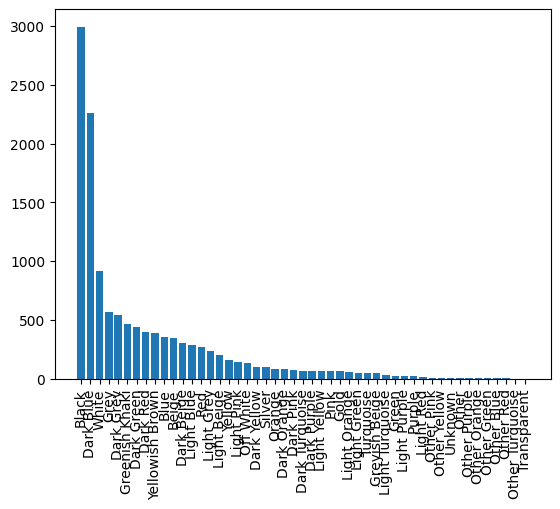

<Figure size 100000x1000 with 0 Axes>

Sport
                   index_group_name
colour_group_name                  
Black                          1317
Dark Blue                       318
Dark Grey                       248
White                           186
Grey                            160
Pink                             97
Dark Green                       91
Light Pink                       87
Other Pink                       79
Dark Red                         70
Dark Pink                        55
Dark Turquoise                   50
Light Grey                       49
Dark Purple                      48
Light Turquoise                  46
Greenish Khaki                   42
Red                              37
Orange                           34
Light Beige                      32
Turquoise                        29
Light Orange                     29
Other Yellow                     26
Green                            24
Beige                            21
Yellowish Brown                  19
Other Orange          

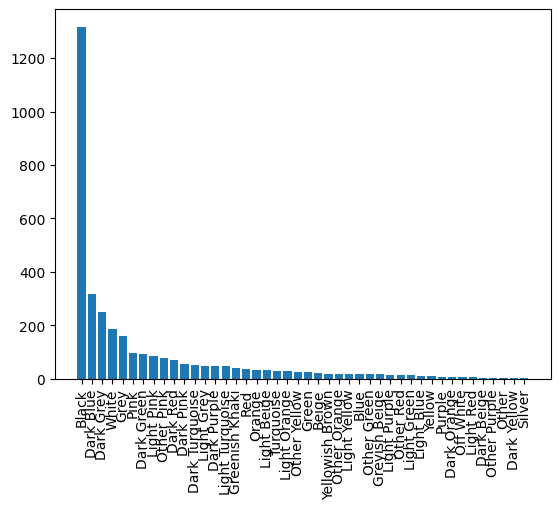

<Figure size 100000x1000 with 0 Axes>

In [ ]:
for i in range(5):
  GIndex = index_group_name.index
  CIndex = sorted_color.index
  index_color = articles[['index_group_name',"colour_group_name"]]

  G = GIndex[i]
  print (G)##########
  Group_color = []
  new_G = index_color.loc[(index_color['index_group_name'] == G)]

  new_G= new_G.groupby("colour_group_name").count()
  new_G= new_G.sort_values(by="index_group_name", ascending = False)
  print (new_G)

  x = np.arange(len(new_G.index))
  X = new_G.index
  Y = new_G["index_group_name"]

  plt.bar(x,Y)
  plt.xticks(x, X)
  plt.xticks(rotation = 90)
  plt.figure(figsize = (1000,10))

  plt.show()